In [49]:
# This script loads the images from /Users/avesga/Code/radialsym and analyzes them with eSRRF3D
# test version to have everything working, later on we will use an automatic python script

# agv, 19Mar2023

import os

import matplotlib as mpl
import stackview
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from nanopyx.methods.esrrf_3d.run import run_esrrf3d

from nanopyx.core.transform._le_esrrf3d import eSRRF3D

In [50]:
plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

In [59]:
# set parameters

path = "/Users/avesga/Code/radialsym/simulations/PLANES_num_planes_9_distance_emitters_0.5_px_size_0.02_int_f_3000_offset_200_int_noise_100.tiff"

In [60]:
# Load file

img = imread(path).astype(np.float32)

In [61]:
# Define variables for eSRRF

magnification_xy=2
magnification_z=2
radius=1
radius_z = 1
ratio_px = 1
sensitivity=1
run_type="Threaded"
correlation="AVG"
framewindow=0
rollingoverlap=2

In [62]:
# esrrf3d
esrrf = eSRRF3D()

rgc_img = run_esrrf3d(img, magnification_xy=magnification_xy, magnification_z=magnification_z, radius=radius, radius_z =radius_z, ratio_px = ratio_px, sensitivity=sensitivity, run_type=run_type, correlation=correlation, framewindow=framewindow, rollingoverlap=rollingoverlap)


Consider adding default arguments to the njit implementation to trigger early compilation
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using Threaded_guided ran in 0.004476208000028237 seconds
Querying the Agent...
Agent: ShiftMagnify_CR using Threaded_guided ran in 0.004404792000059388 seconds
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.007538167000006979 seconds
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.008300208000036946 seconds
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.008426792000022942 seconds
Agent: eSRRF_3D using T

Text(0.5, 1.0, 'XZ intensity at the center')

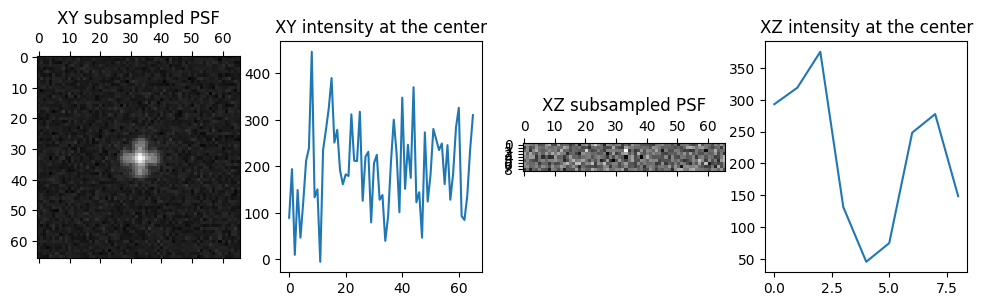

In [63]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

ax[0].matshow(img[img.shape[0]//2, :, : ])
ax[1].plot(img[img.shape[0]//2, img.shape[0]//2, : ])
ax[2].matshow(img[:,:, img.shape[0]//2])
ax[3].plot(img[:,img.shape[0]//2, img.shape[0]//2])

ax[0].set_title("XY subsampled PSF")
ax[1].set_title("XY intensity at the center")
ax[2].set_title("XZ subsampled PSF")
ax[3].set_title("XZ intensity at the center")

In [156]:
def render_z(rgc_img, separation_planes, magnification_z):

    z_section = np.zeros((rgc_img.shape[1], rgc_img.shape[1], rgc_img.shape[1]))

    num_planes = rgc_img.shape[0] // magnification_z
    planes = np.zeros(num_planes)

    if num_planes % 2 == 1:
        planes = np.arange(num_planes) * separation_planes * magnification_z
        planes = planes + planes[planes.size//2]
    else:
        # check if separation_planes is even
        if separation_planes * magnification_z % 2 == 0:
            planes = np.arange(num_planes) * separation_planes * magnification_z
            planes = planes + planes[planes.size//2] - 1
        else:
            # print a warning, saying that the planes are not evenly distributed
            print("Warning: the planes are not evenly distributed. Use even separation for even number of planes.")

    print("Planes chosen are: ", planes)
    for p in range(num_planes):
        
        for m in range(magnification_z):
            z_section[planes[p]-m, :, :] = rgc_img[p*magnification_z+m, :, :]

    return z_section

In [158]:
separation_planes = 3

rgc_img_Z = render_z(rgc_img, separation_planes, magnification_z)

Planes chosen are:  [24 30 36 42 48 54 60 66 72]


Text(0.5, 1.0, 'XZ intensity at the center')

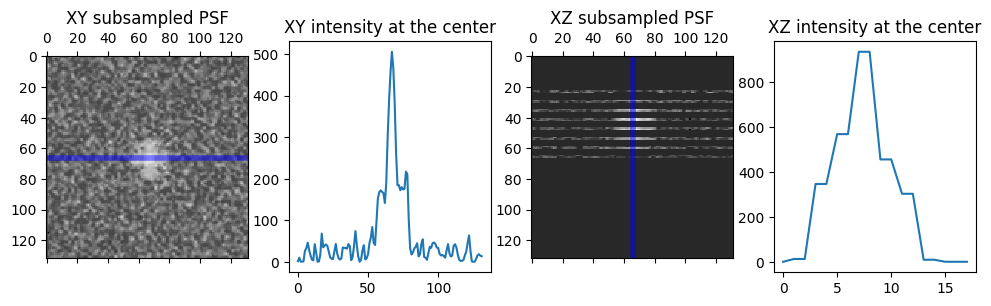

In [159]:
# Plot the profiles

fig, ax = plt.subplots(1, 4, figsize=(12, 3))

gam = 0.3

rgc_img = rgc_img.squeeze()

ax[0].matshow(rgc_img[rgc_img.shape[0]//2, :, : ], norm=mpl.colors.PowerNorm(gam))
ax[0].axhline(rgc_img.shape[1]//2, color='blue', linewidth=4, alpha=0.5)

ax[1].plot(rgc_img[rgc_img.shape[0]//2, rgc_img.shape[1]//2, : ])

ax[2].matshow(rgc_img_Z[:,:, rgc_img.shape[2]//2], norm=mpl.colors.PowerNorm(gam))

ax[2].axvline(rgc_img.shape[2]//2, color='blue', linewidth=4, alpha=0.5)

ax[3].plot(rgc_img[:,rgc_img.shape[1]//2, rgc_img.shape[2]//2])

ax[0].set_title("XY subsampled PSF")
ax[1].set_title("XY intensity at the center")
ax[2].set_title("XZ subsampled PSF")
ax[3].set_title("XZ intensity at the center")